In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from PIL import  Image
%matplotlib inline
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

### 1. Data 

#### 1.1 Data Settings

In [2]:
#Set options to display rows and columns fully
pd.set_option('display.max_info_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# To Suppress warnings while assigning values to dataframe columns
pd.set_option('mode.chained_assignment', None)

In [3]:
# Data Loading
loan = pd.read_csv("loan.csv")
#first few rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### 1.2 Data Overview

In [4]:
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nMissing values :  ", loan.isnull().sum().values.sum())
print ("\nUnique values :  \n",loan.nunique())

Rows     :  39717
Columns  :  111

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'ope

In [5]:
# Inspect the statistics of numeric columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### 2. Data Manipulation

#### 2.1 Handling Null Values

In [6]:
# Returns a Series with percentage of null values in each column rounded to 2 decimals
col_series = round( (loan.isnull().sum()/len(loan))*100,2)
col_series

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
# Returns a list of columns which has more than 50% percentage of null values
col_series = [k for k,v in col_series.items() if (v >= 50)]
col_series

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


##### Dropping columns more than 50% and not required

In [8]:
# Drop columns having more than 50% of null
print('Dropping following ', len(col_series),' Columns :')
print(*col_series, sep = '\n')
loan.drop(labels=col_series, axis=1, inplace=True)
# Dropping few more columns which are not required for our analysis
loan.drop(labels=['emp_title','url','desc','pymnt_plan','initial_list_status','application_type','collections_12_mths_ex_med','tax_liens'],axis=1, inplace=True)

Dropping following  57  Columns :
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit


##### Inspect the data frame after dropping the columns

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_length                38642 non-null  object 
 11  home_ownership            39717 non-null  object 
 12  annual_inc                39717 non-null  float64
 13  verification_status       39717 non-null  object 
 14  issue_

### 2.2 Fixing Columns names and values

##### emp_length column is having <1 year, 10+ years, year like values and need to fix them. 

In [10]:
# Fixing emp_length column as these values should be between 0 to 10, Less than year = 0 
loan['emp_length'] = loan['emp_length'].replace('< 1 year' ,'0')
# Fixing other values of emp_length 10+ years more means 10 and also removing years string. 
loan['emp_length'] = loan['emp_length'].str.replace(r'\D', '', regex=True)

##### term columns values needs triming. 

In [11]:
# Fixing term columns need some trimming
loan['term'] = loan['term'].str.replace(r'\D', '', regex=True)

In [12]:
# Change term, emp_length column name to term_in_Months and emp_length_in_Years for better understandig
loan = loan.rename(columns={'term': 'term_in_Months', 'emp_length': 'emp_length_in_Years'})

##### int_rate, int_rate columns values needs triming.

In [13]:
# Fixing int_rate, revol_util columns need some trimming
loan['int_rate'] = loan['int_rate'].str.replace('%', '')
loan['revol_util'] = loan['revol_util'].str.replace('%', '')

##### Date columns need to fix with proper date format

In [14]:
#earliest_cr_line, last_pymnt_d, last_credit_pull_d columns need proper date fix
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
  #   ,'last_pymnt_d','last_credit_pull_d'] = 
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

In [15]:
# Returns a Series with percentage of null values in each column rounded to 2 decimals
col_series = round( (loan.isnull().sum()/len(loan))*100,2)
col_series
#Print only columns having null values along with their null percentages
col_series.loc[col_series != 0]

emp_length_in_Years         2.71
title                       0.03
revol_util                  0.13
last_pymnt_d                0.18
last_credit_pull_d          0.01
chargeoff_within_12_mths    0.14
pub_rec_bankruptcies        1.75
dtype: float64

### 2.3 Imputing Null Values

##### Impute Column emp_length_in_Years

In [16]:
loan.emp_length_in_Years.value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length_in_Years, dtype: int64

In [17]:
# Convert the 'object' column to numeric, handling errors as 'coerce' to convert non-numeric values to NaN
loan['emp_length_in_Years'] = pd.to_numeric(loan['emp_length_in_Years'], errors='coerce')

In [18]:
# Number of null values
print('Null Values: ', loan.emp_length_in_Years.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.emp_length_in_Years))

Null Values:  1075
Total Number of values:  39717


In [19]:
loan.emp_length_in_Years.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length_in_Years, dtype: float64

<Axes: >

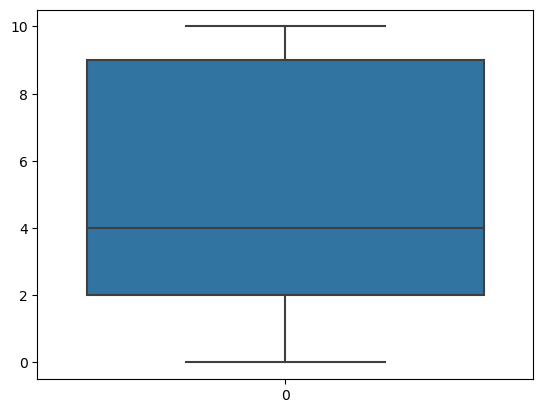

In [20]:
sns.boxplot(loan['emp_length_in_Years'])

 #### Impute emp_length_in_Years
Since this is a continuous numerical variable, we can impute using either the mean or the median. Given that this is a continuous numerical variable, we can impute using either the mean or the median, as seen in the box plot above. The emp_length_in_years box plot shows that there are no extreme values. The data set's mean is a good fit to infer, therefore.

Hence, replace all null values with 5.

In [21]:
loan['emp_length_in_Years'].fillna('5', inplace=True)

##### Impute Column title

In [22]:
loan['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [23]:
# Number of null values
print('Null Values: ', loan.title.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.title))

Null Values:  11
Total Number of values:  39717


In [24]:
loan.title.mode()

0    Debt Consolidation
Name: title, dtype: object

##### Impute title 
For existing data, the majority of the values in this categorical column are debt consolidation. Mode can be used to infer values for categorical data. Out of 39k values, there are only roughly 11 null values. The dataset's mode, "Debt Consolidation," is a blatantly dominant number that we can use to infer. or we can also remove these 11 rows as these are very limited sample. 

Hence, replace all nulls in the title with 'Debt Consolidation'.

In [25]:
loan['title'].fillna('Debt Consolidation', inplace=True)

##### Impute Column revol_util

In [26]:
# Convert the 'object' column to numeric, handling errors as 'coerce' to convert non-numeric values to NaN
loan['revol_util'] = pd.to_numeric(loan['revol_util'], errors='coerce')

In [27]:
# Number of null values
print('Null Values: ', loan.revol_util.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.revol_util))

Null Values:  50
Total Number of values:  39717


In [28]:
loan['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

<Axes: >

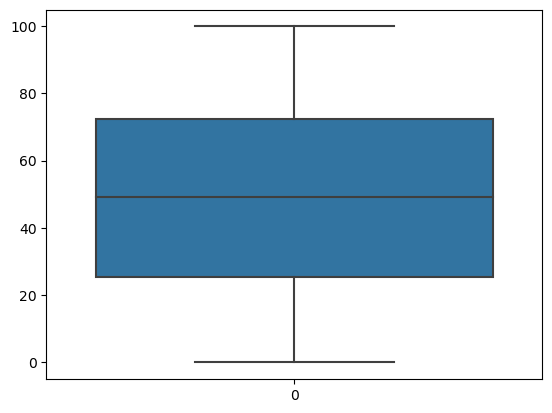

In [29]:
sns.boxplot(loan['revol_util'])

In [30]:
loan['revol_util'].median()

49.3

##### Impute emp_length_in_Years
Since this is a continuous numerical floating variable, we can impute using either the mean or the median. Given that this is a continuous numerical floating variable, we can impute using either the mean or the median, as seen in the box plot above. The emp_length_in_years box plot shows that there are no extreme values. The data set's median is a good fit to infer, therefore.

Hence, replace all null values with 49.30

In [31]:
loan['title'].fillna('49.30', inplace=True)

##### Impute Column last_pymnt_d

In [32]:
# Number of null values
print('Null Values: ', loan.last_pymnt_d.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.last_pymnt_d))

Null Values:  71
Total Number of values:  39717


In [33]:
loan['last_pymnt_d'].describe()

count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [34]:
loan['last_pymnt_d'].mode()

0   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

##### Impute last_pymnt_d
For existing data, the majority of the values in this ordinal column are 2016-05-01. 
Mode can be used to infer values for ordinal data. Out of 39k values, there are only roughly 71 null values.
The dataset's mode, "2016-05-01," is a blatantly dominant number that we can use to infer. or we can also remove these 71 rows as these are very limited sample.
Hence, replace all nulls in the title with '2016-05-01'.

In [35]:
loan['last_pymnt_d'].fillna('2016-05-01', inplace=True)

##### Impute Column last_credit_pull_d

In [36]:
# Number of null values
print('Null Values: ', loan.last_credit_pull_d.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.last_credit_pull_d))

Null Values:  2
Total Number of values:  39717


In [37]:
loan['last_credit_pull_d'].describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

In [38]:
loan['last_credit_pull_d'].mode()

0   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]

##### Impute last_credit_pull_d
For existing data, the majority of the values in this ordinal column are 2016-05-01. Mode can be used to infer values for ordinal data. Out of 39k values, there are only roughly 2 null values. The dataset's mode, "2016-05-01," is a blatantly dominant number that we can use to infer. or we can also remove these 2 rows as these are very limited sample. Hence, replace all nulls in the title with '2016-05-01'.

In [39]:
loan['last_credit_pull_d'].fillna('2016-05-01', inplace=True)

##### Impute Column collections_12_mths_ex_med

In [40]:
#loan.collections_12_mths_ex_med.value_counts()

All values in this column is 0 and this column may not relavent hence sending it for dropping. 

##### Impute Column chargeoff_within_12_mths

In [41]:
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [42]:
# Number of null values
print('Null Values: ', loan.chargeoff_within_12_mths.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.chargeoff_within_12_mths))

Null Values:  56
Total Number of values:  39717


##### Impute column chargeoff_within_12_mths
Actual values in the outgoing data are 0, so we must set null values to 0. Although it is not necessary, I am saving this column in case we need to locate any charge-off loans during the next 12 months.
Hence, fill null values with 0 

In [43]:
loan['last_credit_pull_d'].fillna('0', inplace=True)

##### Impute column pub_rec_bankruptcies

In [44]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [45]:
# Number of null values
print('Null Values: ', loan.pub_rec_bankruptcies.isnull().sum())

# Total number of values
print('Total Number of values: ', len(loan.pub_rec_bankruptcies))

Null Values:  697
Total Number of values:  39717


In [46]:
loan.pub_rec_bankruptcies.mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

##### Impute pub_rec_bankruptcies
Since this is a continuous numerical int variable, we can impute mode values as this column having only 3 numarical values. Given that this is a continuous numerical int variable, we can impute using either mode or the medianThe  The data set's mode is a good fit to infer, therefore.

Hence, replace all null values with 0

In [47]:
loan['pub_rec_bankruptcies'].fillna('0', inplace=True)

##### Impute column tax_liens

In [48]:
#loan.tax_liens.value_counts()

All values in this column is 0 and this column may not relavent hence sending it for dropping. 

In [49]:
loan.to_csv('loan_cleaned.csv', index=False)

### 2.4 Sub-Set of Data


In [50]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_in_Months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length_in_Years', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [51]:
# List of columns to do further analysis on the following subset.
cols = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_in_Months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length_in_Years', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies']

In [52]:
#Create a new data frame with the subset of columns
loan = loan[cols]

In [53]:
#Inspect the new data frame
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        39717 non-null  int64         
 1   member_id                 39717 non-null  int64         
 2   loan_amnt                 39717 non-null  int64         
 3   funded_amnt               39717 non-null  int64         
 4   funded_amnt_inv           39717 non-null  float64       
 5   term_in_Months            39717 non-null  object        
 6   int_rate                  39717 non-null  object        
 7   installment               39717 non-null  float64       
 8   grade                     39717 non-null  object        
 9   sub_grade                 39717 non-null  object        
 10  emp_length_in_Years       39717 non-null  object        
 11  home_ownership            39717 non-null  object        
 12  annual_inc        

### 2.5 Data Types

##### Check the data types of all columns and change if it's required

In [54]:
loan.dtypes

id                                   int64
member_id                            int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term_in_Months                      object
int_rate                            object
installment                        float64
grade                               object
sub_grade                           object
emp_length_in_Years                 object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
title                               object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6m

##### Convert term_in_Months from Object to integer

In [55]:
loan.term_in_Months = loan.term_in_Months.astype(dtype='int')

##### Convert int_rate from Object to float as it is intrest i.e %, should be in float

In [56]:
loan.int_rate = loan.int_rate.astype(dtype='float')

##### Convert grade and sub_grade from Object to string

In [57]:
loan.grade = loan.grade.astype(dtype='str')
loan.sub_grade = loan.sub_grade.astype(dtype='str')

##### Convert emp_length_in_Years from Object to integer as range is from 0 - 10 that is continuous numarical values

In [58]:
loan.emp_length_in_Years = loan.emp_length_in_Years.astype(dtype='int')

##### Convert pub_rec_bankruptcies from Object to integer

In [59]:
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype(dtype='int')


In [60]:
loan.to_csv('loan_cleaned.csv', index=False)

### 2.5 Handle Outliers

Outliers can be identified using box plots for numerical variables

In [61]:
#Print list of numeric columns
loan.select_dtypes(include=np.number).columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_in_Months', 'int_rate', 'installment', 'emp_length_in_Years',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

##  3. Analysis 

### 3.1 Univariate Analysis - Categarical Veriables

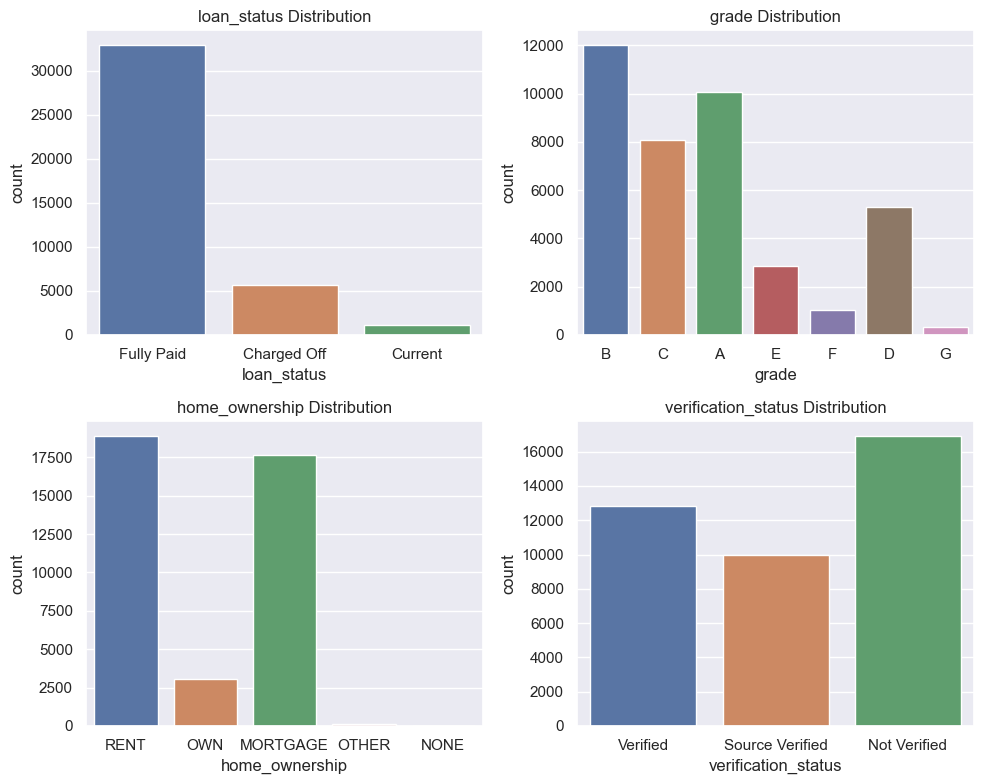

In [120]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Columns to plot
columns_to_plot = ["loan_status", "grade", "home_ownership", "verification_status"]

# Loop through columns and create categorical plots
for i, column in enumerate(columns_to_plot):
    row = i // 2  # Calculate the row position (0 or 1)
    col = i % 2   # Calculate the column position (0 or 1)
    ax = axes[row, col]  # Get the current subplot
    
    sns.countplot(x=column, data=loan, ax=ax)
    ax.set_title(f"{column} Distribution")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



Observations:
1. Most of the barrowers Fully Paid the loans
2. Most of the barrowers fall under A and B Grades
3. Most of the barrowers staying on RENT and Mortgage their properties.
4. Most of the barrowers income not verified by Lender

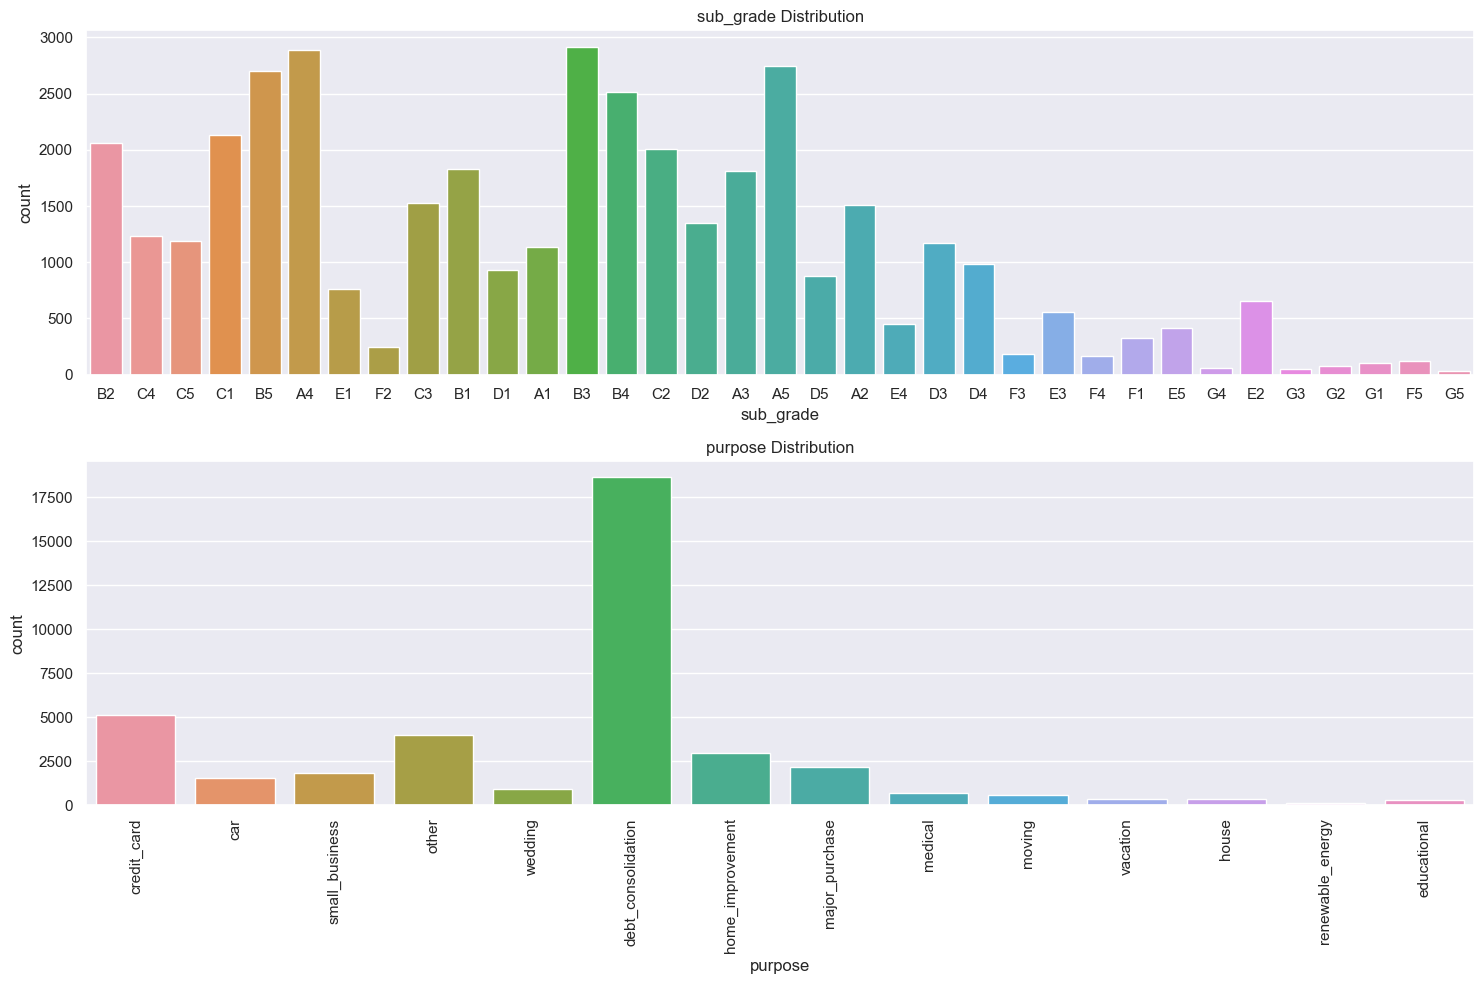

In [133]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Columns to plot (replace these with your own column names)
column1 = "sub_grade"
column2 = "purpose"

# Create countplot for the first column
sns.countplot(x=column1, data=loan, ax=axes[0])
axes[0].set_title(f"{column1} Distribution")

# Create countplot for the second column
sns.countplot(x=column2, data=loan, ax=axes[1])
plt.xticks(rotation=90)
axes[1].set_title(f"{column2} Distribution")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Observations:
1. Most of the barrowers falls under A and B and their most sub_grades under A4, A5 and B3, B4, B5
2. Most of the barrowers pupose for the loan is "Debt Consolidation" 

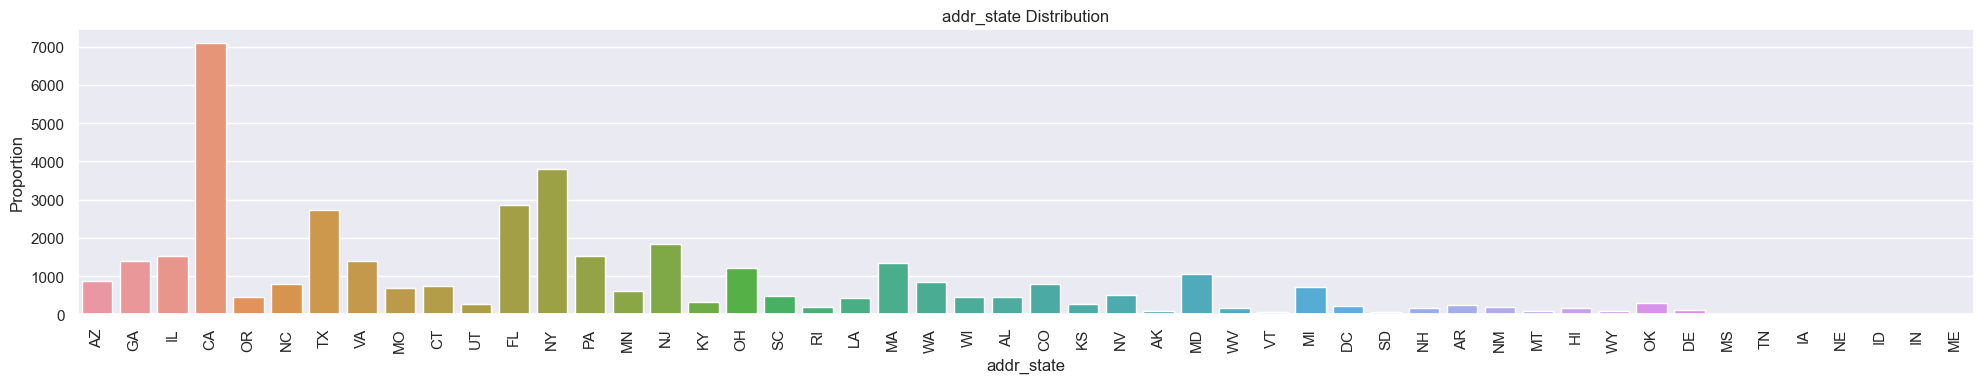

In [141]:
plt.figure(figsize=(20,4))

# Create countplot for the first column
sns.countplot(x="addr_state", data=loan)
plt.xticks(rotation=90)
plt.xlabel("addr_state")
plt.ylabel('Proportion')
plt.title("addr_state"+' Distribution')
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Observations:
Most of the borrowers are from CA and NY

### 3.2 Univariate Analysis - Numarical Veriables